### Libraries


In [1]:
# utility libraries

from datetime import timedelta
import datetime 
import math
import random

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px

# network analysis and visualization
import networkx as nx

# to embed HTML objects
# from IPython.core.display import HTML

# dealing with geographic data
import geopandas as gpd
from geopandas.tools import geocode

# implicitly registered datetime converter for a matplotlib plotting method
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# offline plotly
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

# theme
sns.set_style('whitegrid')

# colors
s = '#442288'
h = '#6CA2EA'
e = '#B5D33D'
m = '#FED23F'
c = '#EB7D5B'

# color palettes
cdr = ['#393e46', '#ff2e63', '#30e3ca'] # grey - red - blue
idr = ['#f8b400', '#ff2e63', '#30e3ca'] # yellow - red - blue

# color palettes
shemc = [s, h, e, m, c]
sec = [s, e, c]

## Date Sets:
### COVID-19 https://www.kaggle.com/imdevskp/corona-virus-report
### SARS https://www.kaggle.com/imdevskp/sars-outbreak-2003-complete-dataset
### H1N1 https://www.kaggle.com/imdevskp/h1n1-swine-flu-2009-pandemic-dataset

### COVID-19 Dataset


In [2]:
data = pd.read_csv("./input/covid_updated_date.csv")

unique_provinces = data['Province/State'][data.Confirmed >0 ].unique()
province_confirmed_cases = []
for i in unique_provinces:
    province_confirmed_cases.append(data[data.Confirmed > 0 ][data['Province/State'] == i].Confirmed.sum())

data['Last Update'] = pd.to_datetime(data['Date last updated']) 
data['Date'] = [datetime.datetime.date(d) for d in data ['Last Update']]
data['Time'] = [datetime.datetime.time(d) for d in data['Last Update']]

data['Date'] = data['Date'].astype(str)
day = data["Date"].values
day = [my_str.split("-")[2] for my_str in day]
data["Date"] = day

data = data.drop(['Last Update'], axis=1)


unique_dates = data['Date'].unique()
unique_dates = np.flipud(unique_dates) 

/home/joe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



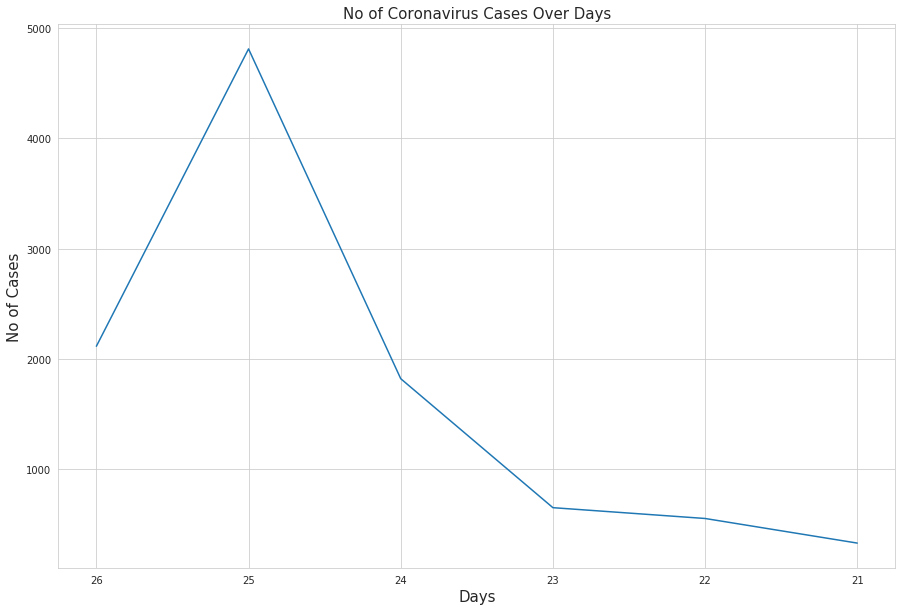

In [3]:

china_cases = []

for i in unique_dates:
    china_cases.append(data[data['Date']==i].Confirmed.sum())

plt.figure(figsize=(15, 10));
plt.plot(unique_dates, china_cases);
plt.title('No of Coronavirus Cases Over Days', size=15);
plt.xlabel('Days', size=15)
plt.ylabel('No of Cases', size=15);
plt.show();

In [4]:
# covid_19 dataset
covid_19 = pd.read_csv('./input/covid_19_clean_complete.csv', 
                       parse_dates=['Date'])

covid_19

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
41494,NaN,Sao Tome and Principe,0.186360,6.613081,2020-06-28,713,13,219,481,Africa
41495,NaN,Yemen,15.552727,48.516388,2020-06-28,1118,302,430,386,Eastern Mediterranean
41496,NaN,Comoros,-11.645500,43.333300,2020-06-28,272,7,161,104,Africa
41497,NaN,Tajikistan,38.861034,71.276093,2020-06-28,5849,52,4448,1349,Europe


In [5]:
covid_19.loc[covid_19['Province/State']=='Greenland', 'Country/Region'] = 'Greenland'

covid_19 = covid_19[['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']]

covid_19['Country/Region'] = covid_19['Country/Region'].replace('Mainland China', 'China')

covid_19.columns = ['Date', 'Country', 'Cases', 'Deaths', 'Recovered']

# group by date and country
covid_19 = covid_19.groupby(['Date', 'Country'])['Cases', 'Deaths', 'Recovered']
covid_19 = covid_19.sum().reset_index()

covid_19.head()

/home/joe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/joe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Country,Cases,Deaths,Recovered
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [6]:
# latest
c_lat = covid_19[covid_19['Date'] == max(covid_19['Date'])].reset_index()

# latest grouped by country
c_lat_grp = c_lat.groupby('Country')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
covid_19['nth_day'] = (covid_19['Date'] - min(covid_19['Date'])).dt.days

# day by day
c_dbd = covid_19.groupby('Date')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
c_dbd['nth_day'] = covid_19.groupby('Date')['nth_day'].max().values

# no. of countries
temp = covid_19[covid_19['Cases']>0]
c_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values

c_dbd['new_cases'] = c_dbd['Cases'].diff()
c_dbd['new_deaths'] = c_dbd['Deaths'].diff()
c_dbd['epidemic'] = 'COVID-19'

/home/joe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/home/joe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



### SARS Dataset


In [7]:
# sars dataset
sars_03 = pd.read_csv("./input/sars_2003_complete_dataset_clean.csv", 
                       parse_dates=['Date'])

# selecting important columns only
sars_03 = sars_03[['Date', 'Country', 'Cumulative number of case(s)', 
                   'Number of deaths', 'Number recovered']]

# renaming columns
sars_03.columns = ['Date', 'Country', 'Cases', 'Deaths', 'Recovered']

# group by date and country
sars_03 = sars_03.groupby(['Date', 'Country'])['Cases', 'Deaths', 'Recovered']
sars_03 = sars_03.sum().reset_index()

/home/joe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [8]:
# latest
s_lat = sars_03[sars_03['Date'] == max(sars_03['Date'])].reset_index()

# latest grouped by country
s_lat_grp = s_lat.groupby('Country')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
sars_03['nth_day'] = (sars_03['Date'] - min(sars_03['Date'])).dt.days

# day by day
s_dbd = sars_03.groupby('Date')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
s_dbd['nth_day'] = sars_03.groupby('Date')['nth_day'].max().values

# no. of countries
temp = sars_03[sars_03['Cases']>0]
s_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values


s_dbd['new_cases'] = s_dbd['Cases'].diff()
s_dbd['new_deaths'] = s_dbd['Deaths'].diff()
s_dbd['epidemic'] = 'SARS'

/home/joe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/home/joe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



### H1N1

In [9]:
# complete dataset
h1n1 = pd.read_csv('./input/h1n1_data.csv')

# fix datetime
h1n1['Date'] = pd.to_datetime(h1n1['Date'])

# first few rows
h1n1.head()

,Date,Country,Cumulative no. of cases,Cumulative no. of deaths,Link
0,2009-04-24,Mexico,18,0,https://www.who.int/csr/don/2009_04_24/en/
1,2009-04-24,United States of America,7,0,https://www.who.int/csr/don/2009_04_24/en/
2,2009-04-26,Mexico,18,0,https://www.who.int/csr/don/2009_04_24/en/
3,2009-04-26,United States of America,20,0,https://www.who.int/csr/don/2009_04_24/en/
4,2009-04-27,Canada,6,0,https://www.who.int/csr/don/2009_04_24/en/


In [10]:
# day wise
h_dbd = h1n1 \
                .groupby('Date')['Cumulative no. of cases', 'Cumulative no. of deaths'] \
                .sum() \
                .reset_index()

# no. of countries column
h_dbd['No. of countries'] = h1n1.groupby('Date').apply(len).values

# column name
h_dbd.columns = ['Date', 'Cases', 'Deaths', 'n_countries']

# epidemic name
h_dbd['epidemic'] = 'H1N1'

# nth day
h_dbd['nth_day'] = (h_dbd['Date'] - min(h_dbd['Date'])).dt.days

# first few rows
h_dbd.head()    

/home/joe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Cases,Deaths,n_countries,epidemic,nth_day
0,2009-04-24,25,0,2,H1N1,0
1,2009-04-26,38,0,2,H1N1,2
2,2009-04-27,73,7,4,H1N1,3
3,2009-04-28,105,7,7,H1N1,4
4,2009-04-29,149,8,9,H1N1,5


### Combine


In [11]:
combined = pd.concat([s_dbd, h_dbd, c_dbd], axis=0, sort=True)
combined.head()

,Cases,Date,Deaths,Recovered,epidemic,n_countries,new_cases,new_deaths,nth_day
0,167,2003-03-17,4,0.0,SARS,7,NaN,NaN,0
1,219,2003-03-18,4,0.0,SARS,9,52.0,0.0,1
2,264,2003-03-19,9,0.0,SARS,11,45.0,5.0,2
3,306,2003-03-20,10,0.0,SARS,12,42.0,1.0,3
4,350,2003-03-21,10,0.0,SARS,14,44.0,0.0,4


### Countries Geo


In [12]:
world_map = gpd.read_file('./input/countries.geojson')
world_map = world_map[world_map['name']!='Antarctica']
world_map = world_map[['name', 'continent', 'geometry']]

# world_map.head()

### Conbine Data


In [13]:
# name of the epidemic
epidemic = ['COVID-19', 'SARS', 'H1N1']
# no. of confirmed cases
confirmed = [c_lat['Cases'].sum(), '8098', '491382']
# no. of deaths reported
deaths = [c_lat['Deaths'].sum(), '774', '18449']
# no. of recovered cases
recovered = [c_lat['Recovered'].sum(), '', '']
# no. of HCW(health care workers) got affected
health_care_workers = ['', '21', '']


In [14]:
# no. of countries or regions to which epidemic spread
no_of_countries_or_region = ['216', '29', '214']
# first reported place
first_reported_place = ['Wuhan, China', 'Foshan City, Guangdong, China', 'Veracruz, Mexico']
# first reported country
first_reported_country = ['China', 'China', 'North America']

# first reported year
first_reported_year = ['2019', '2002', '2009']
# first reported data
first_reported_date = ['8 December, 2019', 'November 16, 2002', 'April 18, 2009']
# epidemic span
span = ['2019-2020', '2002-2004', '2009-2010']

# day on which no. of cases reached 100 
date_100th_case = ['', '', '28, April 2009']
# day on which no. of cases reached 1000
date_1000th_case = ['25 January, 2020', '26 March, 2003', '4 May, 2009 ']
# day on which no. of cases reached 10000
date_10000th_case = ['1 February 2020', '', '20th May, 2009']
# day on which no. of cases reached 100000
date_100000th_case = ['6 March, 2020', '', '']

# estimated no. of people infected by a individual with diseases
ro = ['2-2.5', '2-4', '1.2-1.6']
# cases fatality rate
cfr = ['1.38-3.4', '9.6-11', '0.05-0.1']
# estimated time from exposure to first symptoms
incubation_period = ['4-14', '2-7', '2-6']
# estimated percentage for total cases
hospitalization_rate = ['19', 'Most cases', '2']

### Create Dataframe

In [15]:
# create a dataframe
df = pd.DataFrame({'Epidemic' : epidemic, 
                   'Confirmed': confirmed, 
                   'Deaths': deaths, 
                   'Recovered': recovered, 
                   'HCW': health_care_workers, 
                   
                   'No. of Countries': no_of_countries_or_region, 
                   'First Reported Place': first_reported_place, 
                   'First Reported Country': first_reported_country, 
                   
                   'First Reported Year': first_reported_year, 
                   'First Reported Date': first_reported_date, 
                   '100th Case On': date_100th_case, 
                   '1000th Case On': date_1000th_case, 
                   '10000th Case On': date_10000th_case, 
                   '100000th Case On': date_100000th_case, 
                   
                   'Ro': ro, 
                   'CFR': cfr, 
                   'Incubation Period': incubation_period, 
                   'Hospitalization Rate': hospitalization_rate})

In [16]:
# preprocessing
# =============

# fix numerical values
# ====================
for col in ['Confirmed', 'Deaths', 'Recovered', 'HCW', 'No. of Countries', 
            'First Reported Year']:
    df[col] = df[col].replace('', 0)
    df[col] = df[col].astype('int')
    
    
# fix datetime values
# ===================
for col in ['First Reported Date', '100th Case On', '1000th Case On',
            '10000th Case On', '100000th Case On']:
    # df[col] = df[col].replace('', 0)
    df[col] = pd.to_datetime(df[col])
    
    
# get latitude and longitude of the origin place
# ==============================================

# container for latitude and longitude values
# lon = []
# lat = []

# use geocode library to get latitude and longitude
# for place in df['First Reported Place']:
#     result = geocode(place, timeout=10)
#     point = result.geometry.iloc[0]
#     lon.append(point.x)
#     lat.append(point.y)
    
# manually add latitude and longitude values
lat = [30.5928, 23.0215, 19.1738]
lon = [114.3055, 113.1214, -96.1342]

# add to dataframe
df['Latitude'] = lat
df['Longitude'] = lon
    
# dataframe
df

,Epidemic,Confirmed,Deaths,Recovered,HCW,No. of Countries,First Reported Place,First Reported Country,First Reported Year,First Reported Date,100th Case On,1000th Case On,10000th Case On,100000th Case On,Ro,CFR,Incubation Period,Hospitalization Rate,Latitude,Longitude
0,COVID-19,10145050,501877,5072198,0,216,"Wuhan, China",China,2019,2019-12-08,NaT,2020-01-25,2020-02-01,2020-03-06,2-2.5,1.38-3.4,4-14,19,30.5928,114.3055
1,SARS,8098,774,0,21,29,"Foshan City, Guangdong, China",China,2002,2002-11-16,NaT,2003-03-26,NaT,NaT,2-4,9.6-11,2-7,Most cases,23.0215,113.1214
2,H1N1,491382,18449,0,0,214,"Veracruz, Mexico",North America,2009,2009-04-18,2009-04-28,2009-05-04,2009-05-20,NaT,1.2-1.6,0.05-0.1,2-6,2,19.1738,-96.1342


### Utitlity Functions

In [17]:
# plotly hbar graphs from 'df' dataframe
def plot_hbar(col, title, n=5):
    fig = px.bar(df.sort_values(col,ascending=False)[:n], 
                 x=col, y="Epidemic", color='Epidemic', text=col, 
                 height=350, width=600, orientation='h',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_traces(textposition='auto')
    fig.update_layout(title=title,
                      xaxis_title="",
                      yaxis_title="",
                      uniformtext_minsize=8, 
                      uniformtext_mode='hide', 
                      showlegend=False)
    fig.show()

In [18]:
def plot_treemap(dataframe, var, val):
    fig = px.treemap(dataframe.sort_values(by=val, ascending=False).reset_index(drop=True), 
                 path=[var], values=val, title='Country Wise No. of Cases',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

# COVID-19

In [19]:
c_lat['Country'] = c_lat['Country'].replace('South Korea', 'Korea')
c_lat['Country'] = c_lat['Country'].replace('US', 'United States')
c_lat['Country'] = c_lat['Country'].replace('Taiwan*', 'Taiwan')
c_lat['Country'] = c_lat['Country'].replace('Antigua and Barbuda', 'Antigua and Barb.')
c_lat['Country'] = c_lat['Country'].replace('Bosnia and Herzegovina', 'Bosnia and Herz.')
c_lat['Country'] = c_lat['Country'].replace('Burma', 'Myanmar')
c_lat['Country'] = c_lat['Country'].replace('Central African Republic', 'Central African Rep.')
c_lat['Country'] = c_lat['Country'].replace('Dominican Republic', 'Dominican Rep.')
c_lat['Country'] = c_lat['Country'].replace('Equatorial Guinea', 'Eq. Guinea')
c_lat['Country'] = c_lat['Country'].replace('Laos', 'Lao PDR')
c_lat['Country'] = c_lat['Country'].replace('Saint Kitts and Nevis', 'St. Kitts and Nevis')
c_lat['Country'] = c_lat['Country'].replace('Saint Vincent and the Grenadines', 'St. Vin. and Gren.')
c_lat['Country'] = c_lat['Country'].replace('Western Sahara', 'W. Sahara')
c_lat['Country'] = c_lat['Country'].replace('Cabo Verde', 'Cape Verde')
c_lat['Country'] = c_lat['Country'].replace('Congo (Kinshasa)', 'Dem. Rep. Congo')
c_lat['Country'] = c_lat['Country'].replace('Sao Tome and Principe', 'São Tomé and Principe')
c_lat['Country'] = c_lat['Country'].replace('Eswatini', 'Swaziland')
c_lat['Country'] = c_lat['Country'].replace("Cote d'Ivoire", "Côte d'Ivoire")
c_lat['Country'] = c_lat['Country'].replace('South Sudan', 'S. Sudan')
c_lat['Country'] = c_lat['Country'].replace('Czechia', 'Czech Rep.')
c_lat['Country'] = c_lat['Country'].replace('North Macedonia', 'Macedonia')
c_lat['Country'] = c_lat['Country'].replace('Congo (Brazzaville)', 'Congo')

In [20]:
covid_map = world_map.merge(c_lat, left_on='name', right_on='Country')
covid_map = covid_map.sort_values('Cases', ascending=False)
# covid_map.head()

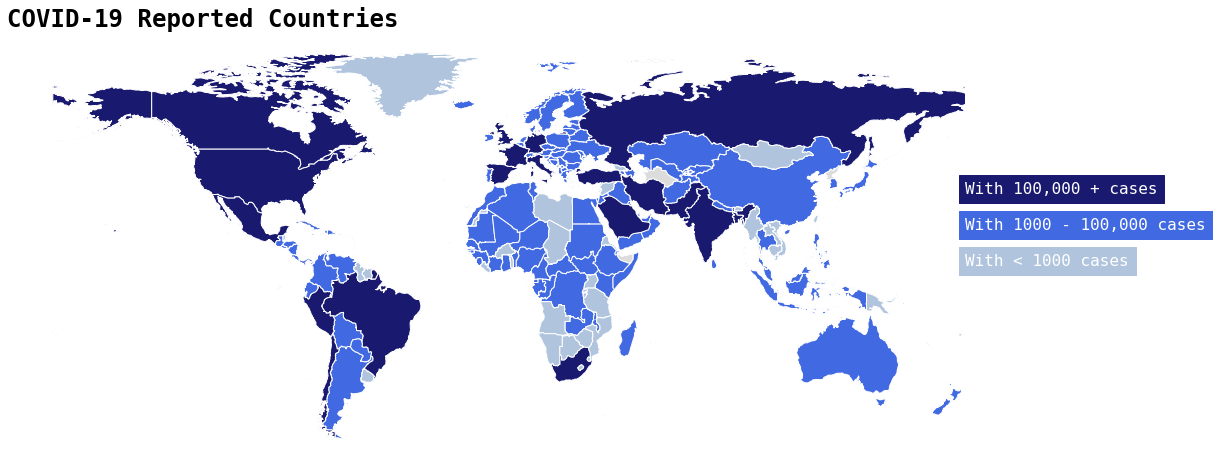

In [21]:
fig, ax = plt.subplots(figsize=(18, 8))

world_map.plot(ax=ax, color='gainsboro')

covid_map.plot(ax=ax, color='royalblue')
covid_map[covid_map['Cases'] > 100000].plot(ax=ax, color='midnightblue')
covid_map[covid_map['Cases'] < 1000].plot(ax=ax, color='lightsteelblue')

ax.text(180, 33, 'With 100,000 + cases', color='white', backgroundcolor='midnightblue',
        fontfamily='monospace', fontsize=16)
ax.text(180, 20, 'With 1000 - 100,000 cases', color='white', backgroundcolor='royalblue',
        fontfamily='monospace', fontsize=16)
ax.text(180, 7, 'With < 1000 cases', color='white', backgroundcolor='lightsteelblue',
        fontfamily='monospace', fontsize=16)

ax.set_title('COVID-19 Reported Countries', loc='left', fontdict={'fontsize':24, 
                                            'fontfamily':'monospace', 
                                            'fontweight': 'bold',
                                            'color':'black'})

ax.set_axis_off()

In [22]:
plot_treemap(c_lat_grp, 'Country', 'Cases')

# SARS

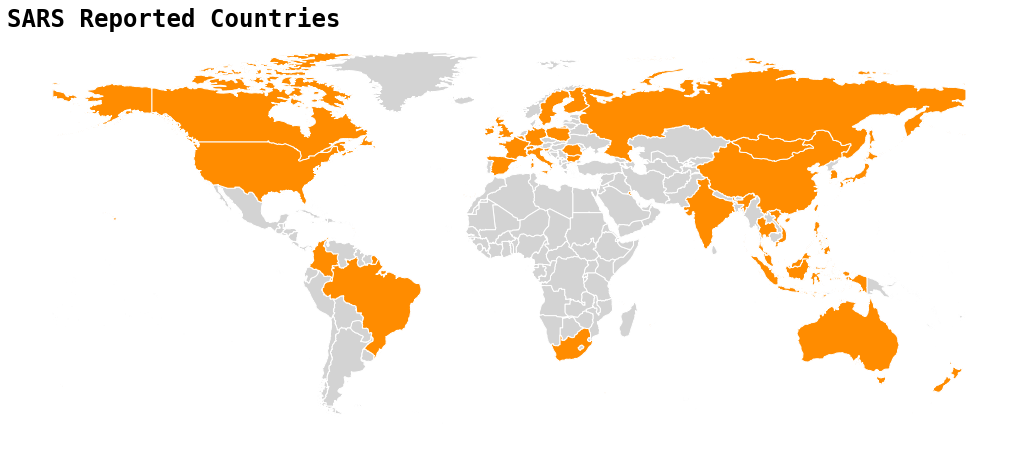

In [23]:
sars_03['Country'] = sars_03['Country'].replace('Hong Kong SAR, China', 'Hong Kong')
sars_03['Country'] = sars_03['Country'].replace('Macao SAR, China', 'Macao')
sars_03['Country'] = sars_03['Country'].replace('Republic of Ireland', 'Ireland')
sars_03['Country'] = sars_03['Country'].replace('Republic of Korea', 'Korea')
sars_03['Country'] = sars_03['Country'].replace('Russian Federation', 'Russia')
sars_03['Country'] = sars_03['Country'].replace('Taiwan, China', 'Taiwan')
sars_03['Country'] = sars_03['Country'].replace('Viet Nam', 'Vietnam')

sar_countries = world_map[world_map['name'].isin(sars_03['Country'].unique())]
# sar_countries.head()

fig, ax = plt.subplots(figsize=(18, 8))

world_map.plot(ax=ax, color='lightgrey')
sar_countries.plot(ax=ax, color='darkorange', markersize=10)

ax.set_title('SARS Reported Countries', loc='left', fontdict={'fontsize':24, 
                                            'fontfamily':'monospace', 
                                            'fontweight': 'bold',
                                            'color':'black'})
ax.set_axis_off()

In [40]:
# people count
plot_treemap(s_lat, 'Country', 'Cases')

# Comparison

## World Map

In [25]:
full_latest = covid_19[covid_19['Date'] == max(covid_19['Date'])].reset_index()

In [26]:

epidemics = df
epidemics['Mortality'] = round((epidemics['Deaths']/epidemics['Confirmed'])*100, 2)

epidemics.head()

,Epidemic,Confirmed,Deaths,Recovered,HCW,No. of Countries,First Reported Place,First Reported Country,First Reported Year,First Reported Date,...,1000th Case On,10000th Case On,100000th Case On,Ro,CFR,Incubation Period,Hospitalization Rate,Latitude,Longitude,Mortality
0,COVID-19,10145050,501877,5072198,0,216,"Wuhan, China",China,2019,2019-12-08,...,2020-01-25,2020-02-01,2020-03-06,2-2.5,1.38-3.4,4-14,19,30.5928,114.3055,4.95
1,SARS,8098,774,0,21,29,"Foshan City, Guangdong, China",China,2002,2002-11-16,...,2003-03-26,NaT,NaT,2-4,9.6-11,2-7,Most cases,23.0215,113.1214,9.56
2,H1N1,491382,18449,0,0,214,"Veracruz, Mexico",North America,2009,2009-04-18,...,2009-05-04,2009-05-20,NaT,1.2-1.6,0.05-0.1,2-6,2,19.1738,-96.1342,3.75


In [27]:
px.scatter_geo(df, lat='Latitude', lon='Longitude', color='Epidemic', 
               hover_data=['First Reported Year', 'First Reported Place'], 
               size=[1 for i in range(len(df))], 
               title='From which place did the epidemic outbroke?',
               color_discrete_sequence = px.colors.qualitative.Dark2)

## Confirmed Cases

In [28]:
plot_hbar('Confirmed', "No. of Confirmed Cases")

In [29]:
plot_hbar('No. of Countries', "No. of Countries to which the epidemic spread", 7)

## Deaths Reported

In [30]:
plot_hbar('Deaths', "No. of Deaths Reported")

## CFR(Case fatality rate)

In [31]:
list_of_epidemic = df['Epidemic'][:6]
list_of_cfr = df['CFR'][:6]
mid = [float(i.split('-')[0]) for i in df['CFR'][:6]]
end = [float(i.split('-')[1]) for i in df['CFR'][:6]]

In [32]:
def plot_cfr(epidemic, mid, end, ax=ax):
    
    inc_day = []
    for i in range(1, 101):
        if(i<mid):
            inc_day.append(2)
        elif(i<end):
            inc_day.append(1)
        else:
            inc_day.append(0)
    inc_day = np.array(inc_day)
    inc_day = inc_day.reshape(10, 10)

    ax=sns.heatmap(inc_day, linewidths=2, square=True, 
                   xticklabels='', yticklabels='', ax=ax,
                   cbar=False, cmap=['whitesmoke', 'coral','tomato'])
    ax.set_title(epidemic, fontdict={'fontsize':16})
    return ax

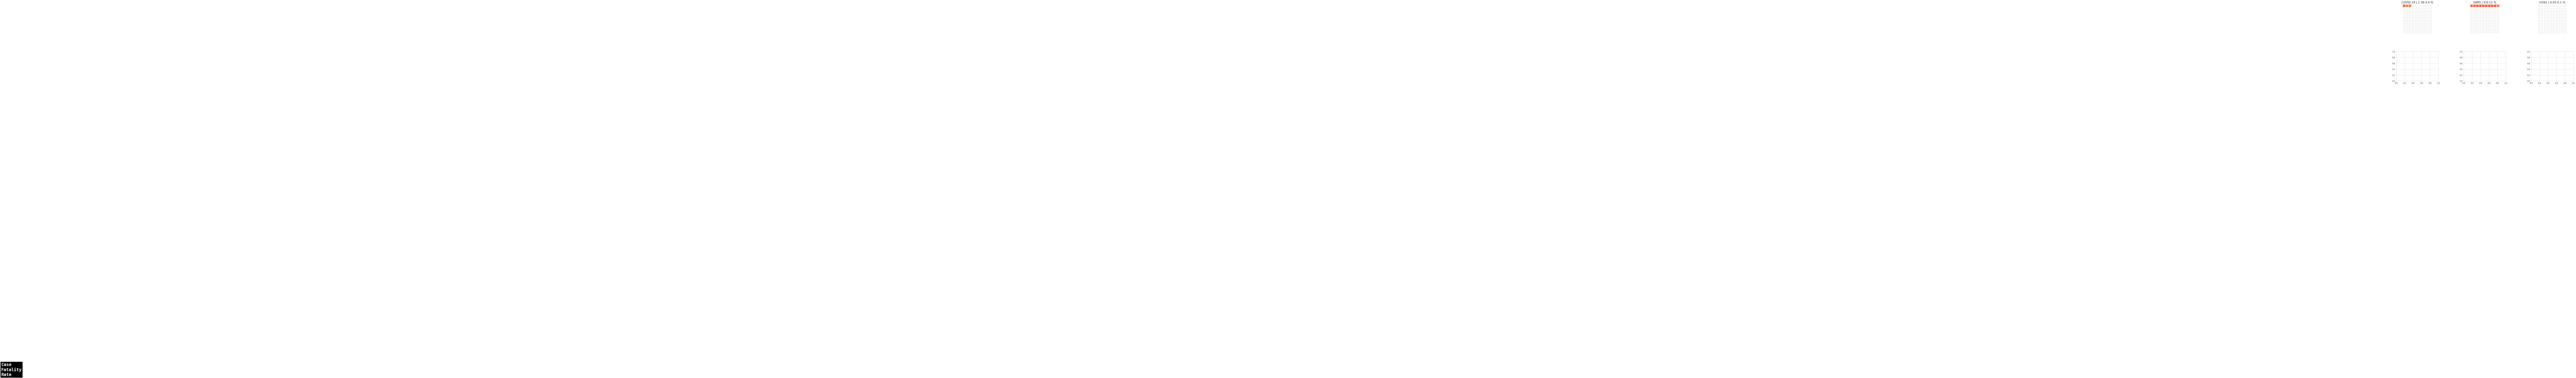

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
plt.subplots_adjust(hspace=0.6, wspace=0.6)
axes = axes.flatten()

plt.text(-60, -10, 'Case\nFatality\nRate', fontsize=24, 
         fontfamily='monospace', fontweight='bold',
         color='white', backgroundcolor='black')

for ind in range(3):
    plot_cfr(list_of_epidemic[ind] + ' | ' + list_of_cfr[ind] + ' %', 
             mid[ind], end[ind], ax=axes[ind])
    
plt.show()

### Incubation Period

In [34]:
list_of_epidemic = df['Epidemic'][:7]
start = [int(i.split('-')[0]) for i in df['Incubation Period'][:7]]
end = [int(i.split('-')[1]) for i in df['Incubation Period'][:7]]
height = [a-b for a, b in zip(end, start)]

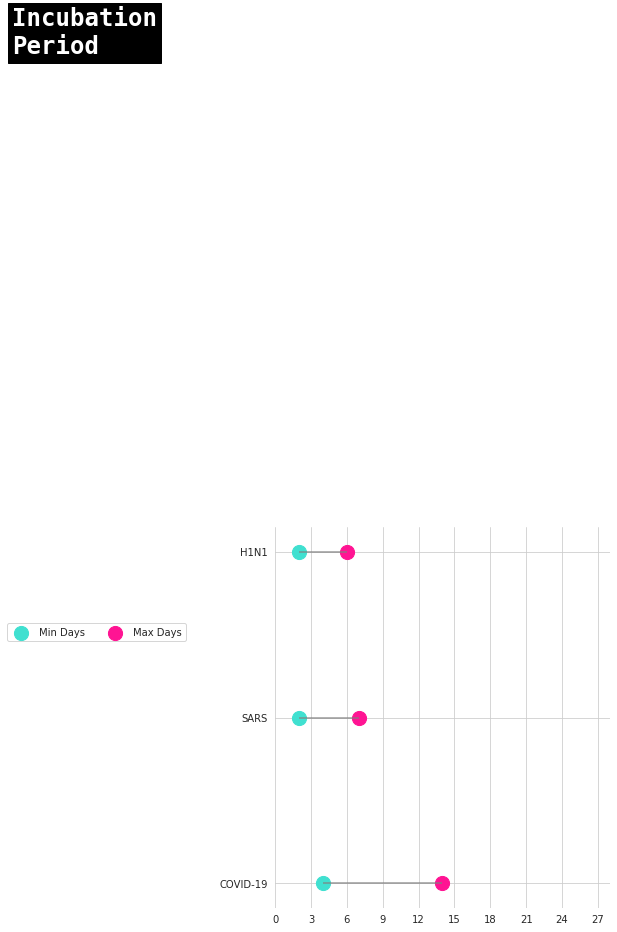

In [35]:
sns.set_style('whitegrid')
plt.figure(figsize=(6, 7))

plt.hlines(y=list_of_epidemic, xmin=start, xmax=end, color='gray', alpha=0.8)
plt.scatter(start, list_of_epidemic, color='turquoise', alpha=1, s=200, label='Min Days')
plt.scatter(end, list_of_epidemic, color='deeppink', alpha=1 , s=200, label='Max Days')
 
plt.text(-22, 5, 'Incubation\nPeriod', fontsize=24, 
         fontfamily='monospace', fontweight='bold',
         color='white', backgroundcolor='black')

sns.despine(left=True, bottom=True)

plt.xlim(0, 28)
plt.xticks([i for i in range(0,29,3)])
plt.legend(loc=(-0.8,0.7), ncol=2)
plt.show()

## No. of days to 1000 case

In [36]:
def plot_first_n_days(col, n_days, title):
    
    temp = combined[combined['nth_day']<=n_days]
    
    fig = px.line(temp, x="nth_day", y=col, color='epidemic', 
                  range_x=[0, n_days], height=600, width=700,
                  title=title+' '+str(n_days)+' days')
    fig.update_layout(xaxis_rangeslider_visible=True)
    fig.update_layout(xaxis_title="",yaxis_title="")
    fig.show()

### In the first 100 days

In [37]:
plot_first_n_days('Cases', 100, 'No. of Cases in the first')

In [38]:
plot_first_n_days('Deaths', 100, 'No. of Deaths in the first')

In [39]:
plot_first_n_days('n_countries', 100, 'No. of countries in the first')